# <span style='background-color: #fff5b1'>오늘의 한 걸음  🚶🏽‍♂️: 코로나 확진 정보 탐색</span>

## Contexts

### 1. READY
    1-1 오늘의 Exp와 Rubric  
    1-2 사용하는 라이브러리  

### 2. GAME
    2-1. 데이터 읽어오기  
    2-2. 데이터 전처리  

---


# 1. Ready
## 1-1. 오늘의 Exp

2020년 초에 발생한 코로나19 바이러스는 세계적으로 유행하였다. 유행 초기에는 이를 분석할 데이터가 충분하지 않았지만 현재는 다양한 데이터 기관에서 코로나 관련 데이터를 공공으로 제공하고 있다. 본 프로젝트에서는 코로나19 확진자 현황 데이터를 바탕으로 탐색적 데이터 분석을 수행한다. 이를 통해 코로나19의 확진 추이 및 환자 특성에 대해서 분석하였다.

특히 온도가 높을 수록 코로나 감염 확률이 높아진다는 논문 자료가 있길래 실제로 데이터가
온도에 따라 확진률에 영향을 주는지 파악하기 위해 데이터를 탐색하였다.

## 1-2. 사용하는 라이브러리

In [8]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 


from IPython.display import Image, display

# 2. GAME
## 2-1. 데이터 읽어오기

데이터는 2020년 1월부터 10월 까지의 코로나 확진자 및  
그에 대한 메타데이터,

그리고 서울시 행정구역 시군구 정보를 나타낸다.

내용은 다음과 같다.

In [10]:
df = pd.read_csv('./코로나19/서울시 코로나19 확진자 현황.csv')
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,5,1.31.,9,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
5744,4,1.30.,7,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
5745,3,1.30.,6,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
5746,2,1.30.,5,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y


In [6]:
df_gps = pd.read_csv('./코로나19/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv')
df_gps


,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


## 2-2. 데이터 전처리

우선 코로나 확진자 데이터부터
시계열적인 데이터를 다루기 위해서  
전처리를 해준 후 Date 타입 유형으로 바꾸었다.

In [11]:
def myNumber(processed) :
    processed = '2020-'+ processed[:-1]
    return processed

df['확진일'] = df['확진일'].apply(myNumber)
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,2020-10.21,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,2020-10.21,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,2020-10.21,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,2020-10.21,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,2020-10.21,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [15]:
# int 데이터를 Datetime 데이터로 변환 후 월/일 데이터 추출
df["확진일"] = pd.to_datetime(df["확진일"].str.replace(".","-"))

df["월"] = df["확진일"].dt.month
df["주"] = df["확진일"].dt.week
df["일"] = df["확진일"].dt.day
df['요일'] = df['확진일'].dt.weekday    # 요일



df[["확진일", "월", "주", "요일", "일"]]

,확진일,월,주,요일,일
0,2020-10-21,10,43,2,21
1,2020-10-21,10,43,2,21
2,2020-10-21,10,43,2,21
3,2020-10-21,10,43,2,21
4,2020-10-21,10,43,2,21
...,...,...,...,...,...
5743,2020-01-31,1,5,4,31
5744,2020-01-30,1,5,3,30
5745,2020-01-30,1,5,3,30
5746,2020-01-30,1,5,3,30


위와 같이 모든 해당 날짜의 월, 주, 요일, 일 단위의 데이터를 추출했다.  
요일 데이터는 1~6의 데이터를 가집니다.



데이터의 열 이름으로 미루어 보았을 때,
다음과 같은 데이터는 제거했습니다.

1. 너무 추상적인 내용이어서 사용할 수 없음  (등록일, 수정일, 노출여부)
2. 데이터가 부족함 (국적, 환자정보, 이동경로)

필터링을 마친 데이터는 다음과 같습니다.

In [19]:
df = df[["확진일", "지역", "주","여행력","접촉력","조치사항", "상태", "월" ,"일","요일"]]
df

,확진일,지역,주,여행력,접촉력,조치사항,상태,월,일,요일
0,2020-10-21,양천구,43,NaN,감염경로 조사중,NaN,NaN,10,21,2
1,2020-10-21,강동구,43,NaN,강남서초 지인모임,NaN,NaN,10,21,2
2,2020-10-21,강남구,43,NaN,기타 확진자 접촉,NaN,NaN,10,21,2
3,2020-10-21,관악구,43,NaN,감염경로 조사중,NaN,NaN,10,21,2
4,2020-10-21,관악구,43,NaN,기타 확진자 접촉,NaN,NaN,10,21,2
...,...,...,...,...,...,...,...,...,...,...
5743,2020-01-31,성북구,5,NaN,#5 접촉,NaN,퇴원,1,31,4
5744,2020-01-30,마포구,5,중국 우한시,해외 접촉,NaN,퇴원,1,30,3
5745,2020-01-30,종로구,5,NaN,#3 접촉,NaN,퇴원,1,30,3
5746,2020-01-30,중랑구,5,중국 우한시,해외 접촉,NaN,퇴원,1,30,3


정제된 데이터에서, 전체적인 확진자 증가 추이를 확인했습니다.

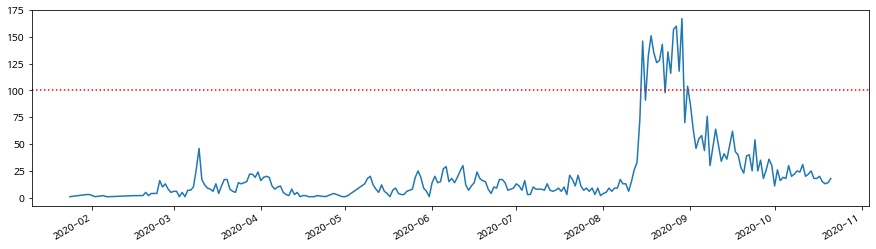

In [21]:
df["확진일"].value_counts().sort_index().plot(figsize=(15,4))
plt.axhline(100, color='red', linestyle=":")

2020년도 8월 중순부터 갑자기  
코로나 환자가 급증함을 볼 수 있습니다.  

때문에 급증된 이유가 무엇인지 판단하기로 했습니다

[]

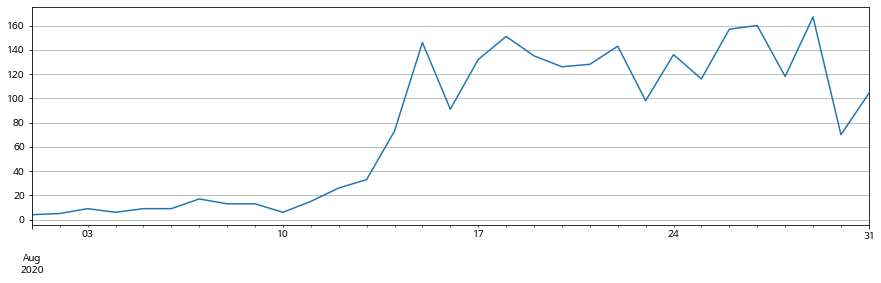

In [28]:
df[df["월"]==8]["확진일"].value_counts().sort_index().plot(figsize=(15,4))
plt.grid(True, axis='both')
plt.plot(color='red', linestyle=":")

8월 중에서도 특히 14일을 기점으로 60명을 돌파합니다.  
이 날의 감염 경로를 불러왔습니다.

<AxesSubplot:>

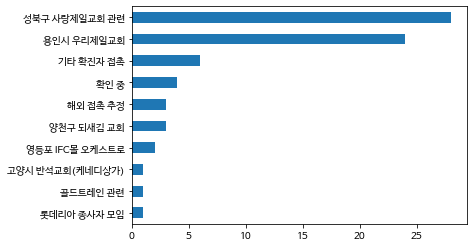

In [29]:
df[df['확진일'] == '2020-08-14']['접촉력'].value_counts().sort_values().plot.barh()


저런, 성북구 사랑제일교회 관련 확진자와 우리제일교회 확진자가  
무진장 속출했네요.

### 🫢



사랑제일교회 총 확진자는 641 명 입니다.
사랑제일교회 총 일일 평균 확진자는 26.708333 명 입니다.


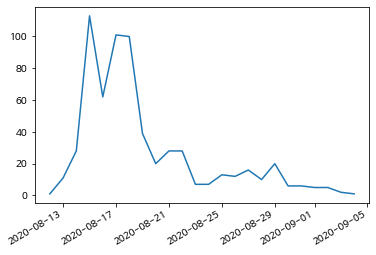

In [44]:
df[df['접촉력'] == '성북구 사랑제일교회 관련']['확진일'].value_counts().plot()

num = df[df['접촉력'] == '성북구 사랑제일교회 관련']['확진일'].value_counts().sum()
mean = df[df['접촉력'] == '성북구 사랑제일교회 관련']['확진일'].value_counts().mean()
print(f'사랑제일교회 총 확진자는 {num} 명 입니다.')
print(f'사랑제일교회 총 일일 평균 확진자는 {mean:1f} 명 입니다.')

사랑제일교회만을 검색했더니, 약 한 달 간 30명에 육박하는  
확진 기록을 자랑했습니다.

실제로 관련 뉴스기사를 찾아보니,  
사랑제일교회로 인해 코로나 확진이 급속화 되었다는  
전문을 찾아볼 수 있었습니다.

뉴스기사 : <a href="https://www.nocutnews.co.kr/news/5414278">"코로나19는 서울사랑제일교회에서 전파"</a>

---


월별 온도와 확진자 수가 비례하는지 알기 위해  
시각화하여 비교하였습니다.

2020년도 서울시 온도 데이터는
기상청에서 가져왔습니다

자료 : <a href="https://data.kma.go.kr/climate/RankState/selectRankStatisticsDivisionList.do">2020년도 서울시 월별 온도 : 기상자료개방포털</a>

In [52]:
df_temp = pd.read_csv('./2022서울시온도.csv', encoding='CP949')
df_temp


,지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),Unnamed: 6,최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,108,서울,Jan-20,1.6,5.9,11.9,2020-01-26,-1.7,-6.5,2020-01-01,NaN
1,108,서울,Feb-20,2.5,7.2,15.6,2020-02-15,-1.3,-11.8,2020-02-06,NaN
2,108,서울,Mar-20,7.7,13.3,20.6,2020-03-26,2.6,-2.8,2020-03-05,NaN
3,108,서울,Apr-20,11.1,16.6,23.8,2020-04-16,6.3,1.9,2020-04-05,NaN
4,108,서울,May-20,18.0,23.3,30.0,2020-05-30,13.7,9.2,2020-05-20,NaN
5,108,서울,Jun-20,23.9,29.0,35.4,2020-06-22,19.9,14.8,2020-06-02,NaN
6,108,서울,Jul-20,24.1,28.0,32.9,2020-07-09,21.1,17.2,2020-07-14,NaN
7,108,서울,Aug-20,26.5,29.3,34.5,2020-08-26,24.4,21.5,2020-08-23,NaN
8,108,서울,Sep-20,21.4,25.6,29.5,2020-09-01,18.0,13.6,2020-09-21,NaN
9,108,서울,Oct-20,14.3,19.5,23.6,2020-10-01,9.6,3.2,2020-10-24,NaN


In [61]:
df_temp = df_temp[["평균기온(℃)", "일시"]]
df_temp

,평균기온(℃),일시
0,1.6,Jan-20
1,2.5,Feb-20
2,7.7,Mar-20
3,11.1,Apr-20
4,18.0,May-20
5,23.9,Jun-20
6,24.1,Jul-20
7,26.5,Aug-20
8,21.4,Sep-20
9,14.3,Oct-20


데이터를 묶어주기 위해 월 데이터를 숫자로 변경해준 후 병합하였습니다.

In [70]:
month = [i for i in range(1,13)]
df_temp["일시"] = month
df_new =pd.merge(df, df_temp, how='inner', left_on='월', right_on='일시').iloc[:,:-1]
df_new


,확진일,지역,주,여행력,접촉력,조치사항,상태,월,일,요일,평균기온(℃)
0,2020-10-21,양천구,43,NaN,감염경로 조사중,NaN,NaN,10,21,2,14.3
1,2020-10-21,강동구,43,NaN,강남서초 지인모임,NaN,NaN,10,21,2,14.3
2,2020-10-21,강남구,43,NaN,기타 확진자 접촉,NaN,NaN,10,21,2,14.3
3,2020-10-21,관악구,43,NaN,감염경로 조사중,NaN,NaN,10,21,2,14.3
4,2020-10-21,관악구,43,NaN,기타 확진자 접촉,NaN,NaN,10,21,2,14.3
...,...,...,...,...,...,...,...,...,...,...,...
5743,2020-01-31,성북구,5,NaN,#5 접촉,NaN,퇴원,1,31,4,1.6
5744,2020-01-30,마포구,5,중국 우한시,해외 접촉,NaN,퇴원,1,30,3,1.6
5745,2020-01-30,종로구,5,NaN,#3 접촉,NaN,퇴원,1,30,3,1.6
5746,2020-01-30,중랑구,5,중국 우한시,해외 접촉,NaN,퇴원,1,30,3,1.6


이후 월별 평균 온도와 확진자 수가 영향이 있는지 파악했습니다.

In [75]:
num = df.groupby('월').size()
num

월
1        7
2       80
3      391
4      156
5      228
6      460
7      281
8     2416
9     1304
10     425
dtype: int64

In [78]:
df_temp

,평균기온(℃),일시,확진수
0,1.6,1,NaN
1,2.5,2,7.0
2,7.7,3,80.0
3,11.1,4,391.0
4,18.0,5,156.0
5,23.9,6,228.0
6,24.1,7,460.0
7,26.5,8,281.0
8,21.4,9,2416.0
9,14.3,10,1304.0


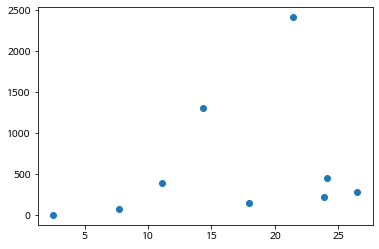

In [81]:
plt.scatter(df_temp["평균기온(℃)"], df_temp["확진수"])
plt.show()


산점도를 봤을 때, 온도와 확진 수 간에 상관관계를 파악하기 어렵습니다.  
따라서, 저는 온도와 코로나 확진자 수 간에 양의 상관관계는 존재하지 않는다고 판단했습니다.